In [ ]:
#This notebook is for the Datathon I participated in 04/05/2020.
#The original dataset is about the consumer complaints about Financial companies, provided by CFPB, Consumer Financial Protection Bureau.
#Source: https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
import numpy as np 
df = pd.read_csv('./complaints.csv')

In [2]:
df.info()
print(df['Product'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548394 entries, 0 to 1548393
Data columns (total 18 columns):
Date received                   1548394 non-null object
Product                         1548394 non-null object
Sub-product                     1313229 non-null object
Issue                           1548394 non-null object
Sub-issue                       984986 non-null object
Consumer complaint narrative    511539 non-null object
Company public response         586680 non-null object
Company                         1548394 non-null object
State                           1522165 non-null object
ZIP code                        1401945 non-null object
Tags                            210035 non-null object
Consumer consent provided?      921846 non-null object
Submitted via                   1548394 non-null object
Date sent to company            1548394 non-null object
Company response to consumer    1548393 non-null object
Timely response?                1548394 non-null obj

In [ ]:
#product and subproduct variable issue
#There are 10 types of official products. However, in the df dataset, there are 18 types of products. But this problem doesn't exist in the dataset starting from 01/05/2017. 
#Therefore, we don't have to run this cell if we run the datatime cell first.

df.loc[df['Product']=='Credit reporting','Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product']=='Credit card','Product'] = 'Credit card or prepaid card'
df.loc[df['Product']=='Bank account or service','Product'] = 'Checking or savings account'
df.loc[df['Product']=='Consumer Loan','Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product']=='Payday loan','Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product']=='Money transfers','Product'] = 'Money transfer, virtual currency, or money service'
df.loc[df['Product']=='Prepaid card','Product'] = 'Credit card or prepaid card'
df.loc[df['Product']=='Virtual currency','Product'] = 'Money transfer, virtual currency, or money service'

In [3]:
# We only need data start from 05/2017 to 03/2020, because the old data do not provide much useful information.
import time
from datetime import datetime
df['Date received'] = pd.to_datetime(df['Date received'], format = '%Y-%m-%d')
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'], format = '%Y-%m-%d')

#only use data after 20170501
b = df.loc[df['Date received'] >='2017-05-01',:]
#print(b.info())
print(b['Product'].value_counts())

Credit reporting, credit repair services, or other personal consumer reports    364032
Debt collection                                                                 140140
Credit card or prepaid card                                                      71536
Mortgage                                                                         70957
Checking or savings account                                                      60188
Student loan                                                                     24429
Vehicle loan or lease                                                            16247
Money transfer, virtual currency, or money service                               14829
Payday loan, title loan, or personal loan                                        12501
Name: Product, dtype: int64


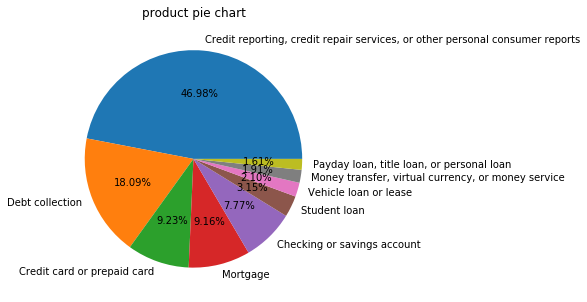

In [4]:
#If we take a look at the pie chart of the products, we can see that the credit reporting variable occupies almost half of the products, which means almost 50% of the compliants were about the credit reporting issues.
#Therefore, we will dive into this product and find out what happened with the credit reporting.
#show the pie chart of products.
product = b['Product'].value_counts()
dfproduct = pd.DataFrame({'product_type':product.index[0:], 'counts': product.values[0:]})
#dfproduct
fig = plt.figure(figsize =[13, 5])
plt.pie(dfproduct.counts, labels = dfproduct.product_type, autopct = '%1.2f%%' )
plt.title('product pie chart')
plt.savefig('productc.jpg')
plt.show()


In [5]:
#get the data of credit reporting issues only.
c = b.loc[b['Product']=='Credit reporting, credit repair services, or other personal consumer reports',:]
c.info()
#rename the product
c.loc[c['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports','Product'] = 'CreditRpt'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364032 entries, 1 to 1548286
Data columns (total 18 columns):
Date received                   364032 non-null datetime64[ns]
Product                         364032 non-null object
Sub-product                     364032 non-null object
Issue                           364032 non-null object
Sub-issue                       355199 non-null object
Consumer complaint narrative    153930 non-null object
Company public response         209724 non-null object
Company                         364032 non-null object
State                           359019 non-null object
ZIP code                        326074 non-null object
Tags                            39325 non-null object
Consumer consent provided?      317395 non-null object
Submitted via                   364032 non-null object
Date sent to company            364032 non-null datetime64[ns]
Company response to consumer    364031 non-null object
Timely response?                364032 non-null 

D:\programming apps\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
#check the missing values
missing = c.isna().sum()
print(missing)
#drop the variables with much missing values
c = c.drop(columns = ['Tags','Consumer disputed?'])
print(c.info())

Date received                        0
Product                              0
Sub-product                          0
Issue                                0
Sub-issue                         8833
Consumer complaint narrative    210102
Company public response         154308
Company                              0
State                             5013
ZIP code                         37958
Tags                            324707
Consumer consent provided?       46637
Submitted via                        0
Date sent to company                 0
Company response to consumer         1
Timely response?                     0
Consumer disputed?              364032
Complaint ID                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 364032 entries, 1 to 1548286
Data columns (total 16 columns):
Date received                   364032 non-null datetime64[ns]
Product                         364032 non-null object
Sub-product                     364032 non-null object


In [44]:
#drop nlp data and features with much null values for Tableau
d = c.drop(columns = ['Consumer complaint narrative'])
d.to_csv('./creditrpt.csv')

In [ ]:
# The following EDA is by Tableau.
#Python is used for generating a wordcloud picture.
#The wordcloud part uses the consumer complaint narratives only.

In [ ]:
#about nlp data- c
c = c['Consumer complaint narrative']
c.dropna(inplace = True)

c.to_csv('./narrative.txt', sep='\t', index=False)

In [ ]:
#Generate word cloud.
#nlp2
# 词云展示
!pip install nltk
!pip install pillow
!pip install lxml
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize



# 去掉停用词
def remove_stop_words(f):

    f_stop = open('./stopword111.txt', encoding='utf-8')
    try:
        f_stop_text = f_stop.read( )                      #获取停用词词表中的内容
    finally:
        f_stop.close( )
    stop_words = f_stop_text.split('\n')
     
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
	# 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# 数据加载

def getText():
    txt=open("./narrative.txt","r",encoding='utf-8').read() #打开文件
    txt=txt.lower()                  #将所有单词转换为小写去掉大小写的干扰
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>': #去掉所有的特殊符号
        txt=txt.replace(ch," ")   #将特殊符号替换成空格 即去掉
    return txt
hmltTxt=getText()    #对文件进行读取
all_word=hmltTxt.split()

# 生成词云
create_word_cloud(text)

In [ ]:
#DO NOT RUN THIS CELL!!!

#nlp1
#https://blog.csdn.net/HuangZhang_123/article/details/80277793
def getText():
    txt=open("./narrative.txt","r",encoding='utf-8').read() #打开文件
    txt=txt.lower()                  #将所有单词转换为小写去掉大小写的干扰
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>': #去掉所有的特殊符号
        txt=txt.replace(ch," ")   #将特殊符号替换成空格 即去掉
    return txt
hmltTxt=getText()    #对文件进行读取
words=hmltTxt.split()
#因为现在单词间均为空格分隔开来，所以用split用空格分隔他们并变成列表返回
counts={} #建立一个字典
for word in words:
    counts[word]=counts.get(word,0)+1
    #用当前的某一个单词作为键索引字典 如果在里面则返回次数再加一 若不在里面则直接加1
items=list(counts.items())
#用list将counts变为一个列表类型  counts.items()-->返回可遍历的（键，值）元组数组
items.sort(key=lambda x:x[1],reverse=True)
#使用list.sort()方法来排序，此时list本身将被修改
for i in range(100):
    word,count=items[i]         
    print("{0:<10}{1:>5}".format(word,count))
